## For fun 

Try to generate city name for country 

https://www.kaggle.com/datasets/joebeachcapital/geonames-all-cities?resource=download

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


df_raw = pd.read_csv('geonames-all-cities-with-a-population-500.csv', sep=';')


# Clean the df 

# Be sur that name are string
df = df_raw[ (df_raw['ASCII Name'].astype(str).str.isalpha()) & ~df_raw['ASCII Name'].isna() & ~df_raw['ASCII Name'].isnull()]

df["ASCII Name"] = df["ASCII Name"].apply(str.lower)

df

,Geoname ID,Name,ASCII Name,Alternate Names,Latitude,Longitude,Feature Class,Feature Code,Country Code,Country Code 2,...,Admin2 Code,Admin3 Code,Admin4 Code,Population,Elevation,DIgital Elevation Model,Timezone,Modification date,Country,Coordinates
0,689373,Vladislavovka,vladislavovka,"Vladislavivka,Vladislavovka,Владиславовка,Влад...",45.46872,34.59087,P,PPL,UA,NaN,...,0104,11152975,NaN,839,26.0,29,Europe/Simferopol,2022-10-27,Ukraine,"45.46872, 34.59087"
1,689584,Vilnyansk,vilnyansk,"Chervonoarmijs'ke,Chervonoarmiyske,Krasnoarmij...",47.94768,35.44034,P,PPLA2,UA,NaN,...,2306,NaN,NaN,15044,149.0,148,Europe/Kyiv,2022-12-19,Ukraine,"47.94768, 35.44034"
3,690434,Vary,vary,"Mezovari,Mezővári,Vari,Vary,Vári,Вари",48.12278,22.70878,P,PPL,UA,NaN,...,2102,NaN,NaN,2998,NaN,117,Europe/Kyiv,2022-12-13,Ukraine,"48.12278, 22.70878"
4,690509,Valky,valky,"Valki,Valky,Валки",49.83597,35.61223,P,PPL,UA,NaN,...,6302,NaN,NaN,10381,NaN,138,Europe/Kyiv,2022-10-27,Ukraine,"49.83597, 35.61223"
6,690713,Blahovishchenske,blahovishchenske,"Blagoveshhenskoe,Blagovishhens'ke,Blahovichtch...",48.32822,30.23619,P,PPLA2,UA,NaN,...,3502,NaN,NaN,6051,120.0,143,Europe/Kyiv,2022-10-27,Ukraine,"48.32822, 30.23619"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199719,2769324,Oetz,oetz,"Ec,Ehc,Ehtc,Oetz,Otz,e ci,Ötz,Ец,Этц,Эц,厄茨",47.20000,10.90000,P,PPLA3,AT,NaN,...,702,70214,NaN,2402,812.0,786,Europe/Vienna,2018-07-28,Austria,"47.2, 10.9"
199720,2769339,Ottenthal,ottenthal,NaN,48.76100,16.57914,P,PPLA3,AT,NaN,...,316,31658,NaN,428,NaN,234,Europe/Vienna,2018-07-28,Austria,"48.761, 16.57914"
199722,2770479,Nikolsdorf,nikolsdorf,"Nikol'sdorf,Nikolsdorf,ni ke er si duo fu,Нико...",46.78583,12.91333,P,PPLA3,AT,NaN,...,707,70718,NaN,598,NaN,770,Europe/Vienna,2018-07-28,Austria,"46.78583, 12.91333"
199724,2770778,Neuhaus,neuhaus,NaN,47.99521,16.04588,P,PPL,AT,NaN,...,306,30645,NaN,652,NaN,378,Europe/Vienna,2018-07-28,Austria,"47.99521, 16.04588"


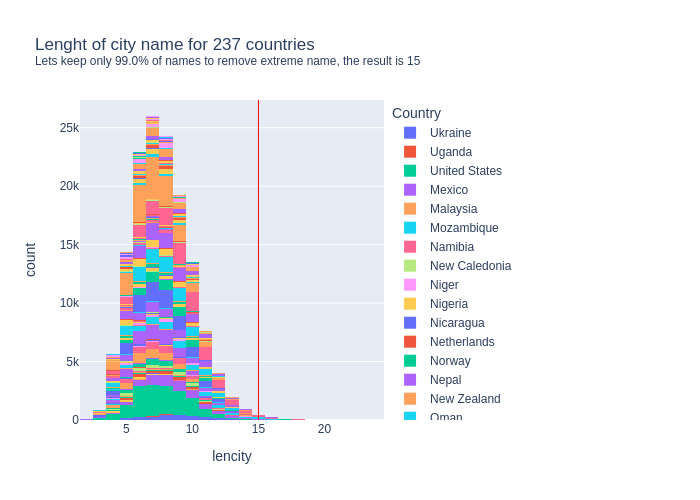

In [2]:
import plotly.express as px

# Set a limit to avoir too long name, in percent 
LIMIT = 0.99


df['lencity'] = df["ASCII Name" ].apply(lambda x: len(str(x)) )


# Calculate quantiles (percentiles)
LIMIT_CHAR = int(df['lencity'].quantile(LIMIT))+1  # You can specify the quantiles you need

# Create a histogram using Plotly Express
fig = px.histogram(df, x='lencity', 
                   color="Country", 
                   title=f'Lenght of city name for {df["Country"].nunique() } countries<br><sup>Lets keep only {LIMIT*100}% of names to remove extreme name, the result is {LIMIT_CHAR} </sup> ')


# Add vertical lines for the quantile
fig.add_shape(
    type='line',
    x0=LIMIT_CHAR,
    x1=LIMIT_CHAR,
    y0=0,
    y1=1,
    xref='x',
    yref='paper',  # Set yref to 'paper' for relative positioning on the plot
    line=dict(color='red', width=1)  # Customize the line appearance
)

fig.show("png")

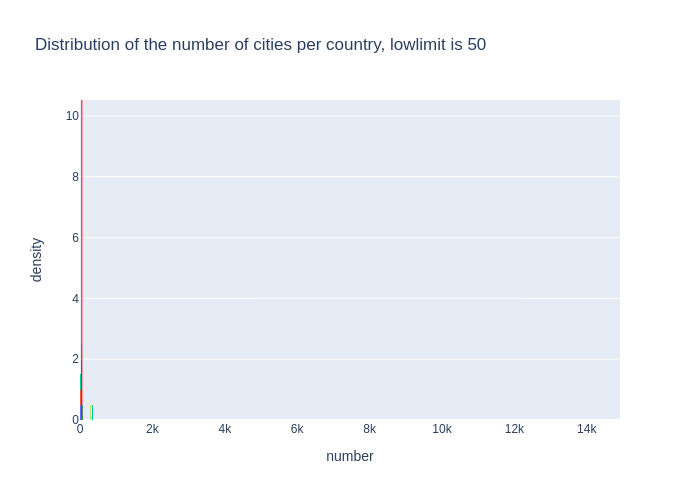

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np  # Import numpy for np.log


LIMIT_CITY = 50

# Count the occurrences of each unique value in the "Country" column
count1 = df["Country"].value_counts()

# Create a DataFrame to store the counts
dff = pd.DataFrame()

# Set the "name" column to contain the country names as strings
dff["name"] = [str(i) for i in count1.index]

# Set the "number" column to contain the count values
dff["number"] = count1.values

# Calculate the logarithm of count values and store it in "number_log" column
dff["number_log"] = np.log(count1.values)

# Create a histogram using Plotly Express
fig = px.histogram(dff, 
                   x='number',
                   histnorm="density",
                   color="name", 
                   hover_name="number",
                
                   title=f'Distribution of the number of cities per country, lowlimit is {LIMIT_CITY}',
                   nbins = 10000
                   )

# Hide the legend since it's not needed in this case
fig.update_layout(showlegend=False)

fig.add_shape(
    type='line',
    x0=LIMIT_CITY,
    x1=LIMIT_CITY,
    y0=0,
    y1=1,
    xref='x',
    yref='paper',  # Set yref to 'paper' for relative positioning on the plot
    line=dict(color='red', width=1)  # Customize the line appearance
)


fig.show("png")

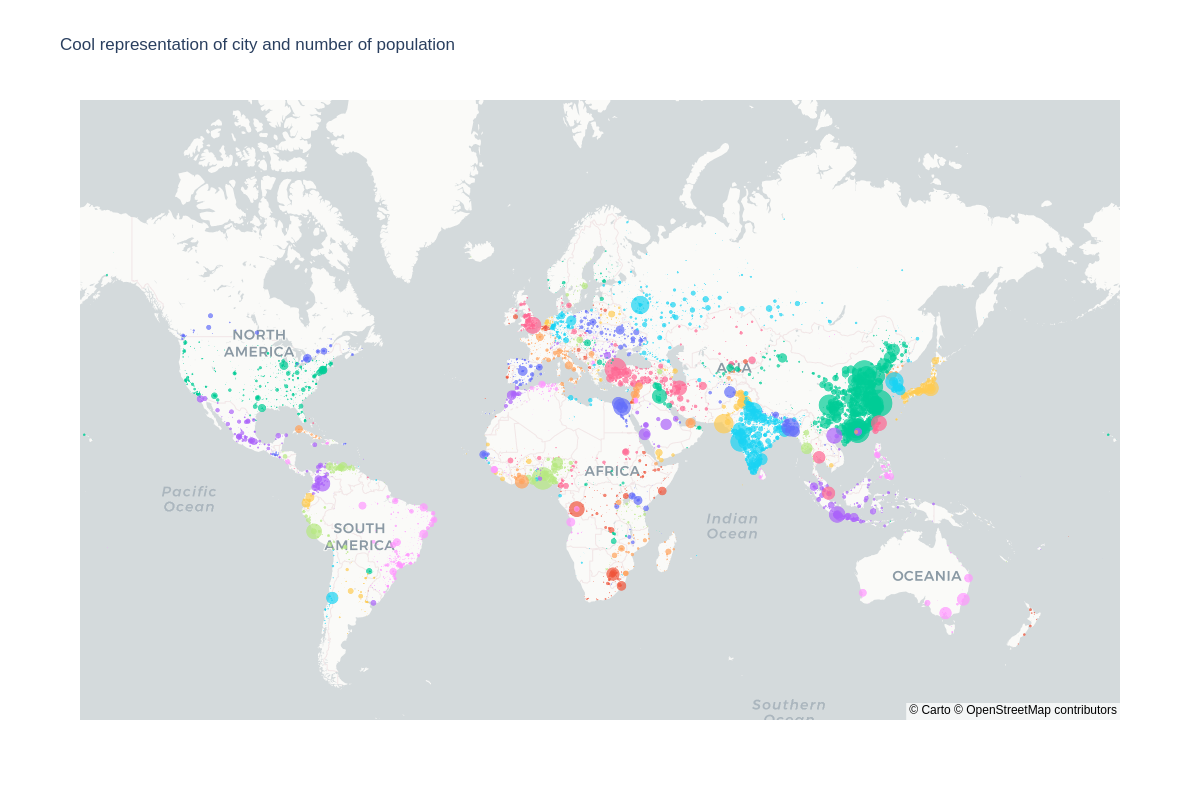

In [4]:
import plotly.express as px

# Split the "Coordinates" column into "lat" and "lon" columns, and convert them to float
df[['lat', 'lon']] = df['Coordinates'].str.split(', ', expand=True).astype(float)

# Create a scatter map using Plotly Express
fig = px.scatter_mapbox(df[(df['Population'] > 10000)], 
                        lat="lat", 
                        lon="lon",
                        hover_name="ASCII Name",
                        size="Population",
                        color="Country", 
                        zoom=1,
                        mapbox_style="carto-positron",
                        title="Cool representation of city and number of population"
                       )

fig.update_layout(
    autosize=False,
    showlegend=False,
    width=1200,
    height=800,
)

fig.show("png")

In [5]:
#REMOVE LOW COUNTRY and BIG NAMES 

# Record the initial number of cities
n_city_before = df.shape[0]

# Record the initial number of unique countries
NUMBER_COUNTRY_before = df["Country"].nunique()

# Select city names within the central 99.9% range of lengths
df_trimmed = df[(df['lencity'] > 1) & (df['lencity'] < LIMIT_CHAR)]

# Remove countries with fewer than 10 cities
# Count the number of cities per country in the trimmed DataFrame
city_counts = df_trimmed["Country"].value_counts()

# Get the list of countries with 10 or more cities
countries_with_X_or_more_cities = city_counts[city_counts >= LIMIT_CITY].index.tolist()

# Filter the DataFrame to include only countries with 10 or more cities
df_trimmed = df_trimmed[df_trimmed["Country"].isin(countries_with_X_or_more_cities)]

# Record the number of cities and unique countries after trimming
n_city_after = df_trimmed.shape[0]
NUMBER_COUNTRY = df_trimmed["Country"].nunique()

# Print information about the trimming process
print(n_city_before - n_city_after, "cities were removed")
print(NUMBER_COUNTRY_before - NUMBER_COUNTRY, "countries were removed")

print(f"The minimun number of city/country is set to : {LIMIT_CITY} cities")
print(f"The maximum length of village names is set to: {LIMIT_CHAR} characters")
print(f"For {NUMBER_COUNTRY} countries")

2667 cities were removed
116 countries were removed
The minimun number of city/country is set to : 50 cities
The maximum length of village names is set to: 15 characters
For 121 countries


In [6]:
# The country distibution are not equal
# we need to reduce the unbalance and increase articialy the number of city in country unrepresented 

# Increase the first 50% of the disrtibution 
# Calculate the 50th percentile threshold for the distribution of "Country" column
LIM50 = df_trimmed['Country'].value_counts().quantile(0.5)

# Get the list of countries with counts below the threshold
countries_to_repeat = df_trimmed['Country'].value_counts()[df_trimmed['Country'].value_counts() < LIM50].index.tolist()

# Create a DataFrame containing rows from countries in the "countries_to_repeat" list repeated 10 times
repeated_df = pd.concat([df_trimmed[df_trimmed['Country'] == country].sample(frac=1, replace=True).reset_index(drop=True).head(10) for country in countries_to_repeat])

# Concatenate the repeated DataFrame with the original DataFrame
df_trimmed_balanced = pd.concat([df_trimmed, repeated_df], axis=0)

# Reset the index of the resulting DataFrame
df_trimmed_balanced.reset_index(drop=True, inplace=True)

In [7]:
import numpy as np
import random

def string_vectorizer(string, max_len):
    li_string = list( str(string) )
    while len(string)<max_len:
        string+="0"
    ints = np.fromstring(string.lower(),dtype=np.uint8)-97
    out = (ints[:,None] == np.arange(26)).astype(int)
    return out


r = random.randrange(0, 10000)

X = df_trimmed_balanced["ASCII Name" ].apply(lambda x: string_vectorizer(x , LIMIT_CHAR ) )
Y = df_trimmed_balanced["Country"] 
print(f"Example:\nCountry: {Y[r]}, City name: {df_trimmed_balanced['ASCII Name'][r]}")

print( X[r])


/tmp/ipykernel_324922/3816939949.py:8: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



Example:
Country: Greece, City name: theodoriana
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X contains village names and Y contains country names
# Split the data into training (70%), test (30%)
X_train_raw, X_test_raw, Y_train_raw, Y_test_raw = train_test_split(X, Y, test_size=0.3, random_state=12) 

# Check the shapes of the resulting sets
print("Train data shape:", X_train_raw.shape, Y_train_raw.shape)
print("Validation data shape:", X_test_raw.shape, Y_test_raw.shape)

Train data shape: (98266,) (98266,)
Validation data shape: (42115,) (42115,)


In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def convert_dataframe_to_tensor(dataframe):
    max_shape = max(row.shape for row in dataframe)
    padded_tensors = [np.pad(row, [(0, max_shape[0] - row.shape[0]), (0, 0)]) for row in dataframe]
    tensor_batch = tf.stack([tf.convert_to_tensor(row) for row in padded_tensors])
    return tensor_batch

2023-09-13 15:02:39.651871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 15:02:40.634393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
X_test = convert_dataframe_to_tensor(X_test_raw)
X_train = convert_dataframe_to_tensor(X_train_raw)

2023-09-13 15:02:43.491644: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
Y_train = pd.get_dummies(Y_train_raw, columns=['Country'], prefix='Country')
Y_test = pd.get_dummies(Y_test_raw, columns=['Country'], prefix='Country')

In [12]:
#Check the shapes

print( X_train.shape )
print( Y_train.shape )

print( X_test.shape )
print( Y_test.shape )

(98266, 16, 26)
(98266, 121)
(42115, 16, 26)
(42115, 121)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM , Bidirectional, GRU

#Save the result of training
checkpoint_path = "training_1/cp.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


# Define the RNN model
model = Sequential()  # Adjust input_length to match your desired number of timesteps
model.add(Bidirectional(LSTM(LIMIT_CHAR), input_shape=(LIMIT_CHAR + 1, 26)))
model.add(Dense(NUMBER_COUNTRY*100, activation='sigmoid'))
model.add(Dense(NUMBER_COUNTRY, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

2023-09-13 15:03:07.407186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-13 15:03:07.409541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-13 15:03:07.411080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 30)               5040      
 l)                                                              
                                                                 
 dense (Dense)               (None, 12100)             375100    
                                                                 
 dense_1 (Dense)             (None, 121)               1464221   
                                                                 
Total params: 1,844,361
Trainable params: 1,844,361
Non-trainable params: 0
_________________________________________________________________


2023-09-13 15:03:07.637153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-13 15:03:07.639200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-13 15:03:07.640817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [14]:
# Train the model with the callback
model.fit(X_train, 
          Y_train,
          epochs=20,
          callbacks=[cp_callback])  # Pass callback to training

Epoch 1/20


2023-09-13 15:03:08.146299: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-13 15:03:08.148814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-13 15:03:08.150577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3071/3071 [==============================] - ETA: 0s - loss: 3.3251 - accuracy: 0.2367
Epoch 1: saving model to training_1/cp.ckpt
3071/3071 [==============================] - 84s 26ms/step - loss: 3.3251 - accuracy: 0.2367
Epoch 2/20
3071/3071 [==============================] - ETA: 0s - loss: 2.7839 - accuracy: 0.3070
Epoch 2: saving model to training_1/cp.ckpt
3071/3071 [==============================] - 80s 26ms/step - loss: 2.7839 - accuracy: 0.3070
Epoch 3/20
3070/3071 [============================>.] - ETA: 0s - loss: 2.6122 - accuracy: 0.3456
Epoch 3: saving model to training_1/cp.ckpt
3071/3071 [==============================] - 79s 26ms/step - loss: 2.6121 - accuracy: 0.3457
Epoch 4/20
3071/3071 [==============================] - ETA: 0s - loss: 2.4942 - accuracy: 0.3699
Epoch 4: saving model to training_1/cp.ckpt
3071/3071 [==============================] - 80s 26ms/step - loss: 2.4942 - accuracy: 0.3699
Epoch 5/20
3071/3071 [==============================] - ETA: 0s - loss:

In [15]:
#LOAD FROM THE CALLBACK

# Load the previously saved weights
#model.load_weights(checkpoint_path)

In [16]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy}")

2023-09-13 15:29:41.261805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-13 15:29:41.263887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-13 15:29:41.265824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1317/1317 [==============================] - 14s 10ms/step - loss: 2.0111 - accuracy: 0.4822
Test Accuracy: 0.4821797311306


In [17]:
#tf.keras.utils.plot_model(model, to_file='my_model.png')

In [18]:
import plotly.graph_objects as go

def show_prediction(city_name):
    #transform
    city_name_vector = string_vectorizer(city_name,LIMIT_CHAR + 1 )
    city_name_tensor = convert_dataframe_to_tensor( [city_name_vector])
    pred_probs = model.predict(city_name_tensor)
    column_names = Y_train.columns.values
    # Get the indices of the top three predicted probabilities for each example
    top5_indices = np.argsort(pred_probs, axis=1)[:, -5:]

    # Get the corresponding country names for the top three predictions
    top5_country_names = [column_names[i] for i in top5_indices]

    d = {'Country': [x[ 8:] for x in top5_country_names[0]] , 
         'probs': pred_probs[0][top5_indices[0]]}

    df = pd.DataFrame(data=d)

    
    # Create a bar trace with color scaling
    fig = go.Figure(data=[
        go.Bar(
            x=df['Country'],
            y=df['probs'],
            marker=dict(
                color=df['probs'],
                colorscale='RdYlGn',  # Choose a color scale (red to green)
                colorbar=dict(title='Probs'),  # Add a color bar legend
                cmin=0,  # Minimum value for the colorscale
                cmax=1,
            ),
        )
    ])

    fig.update_layout(
        xaxis_title='Country',
        yaxis_title='Probs',
        title=f'Country probality of : "{city_name}"',
    )
    
    # Set the y-axis range from 0 to 1
    fig.update_yaxes(range=[0, 1])

    fig.show("svg")

    # Now, top5_country_names contains the three most probable country names for each example
    #print(f"Result for {city_name} : ")
    #for i in [ 4,3,2,1,0]:
    #    print(top5_country_names[0][i] , pred_probs[0][top5_indices[0][i] ] )  

/tmp/ipykernel_324922/3816939949.py:8: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead

2023-09-13 15:29:54.931827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-13 15:29:54.933401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-13 15:29:54.935214: I tensorflow/core/com

1/1 [==============================] - 1s 740ms/step


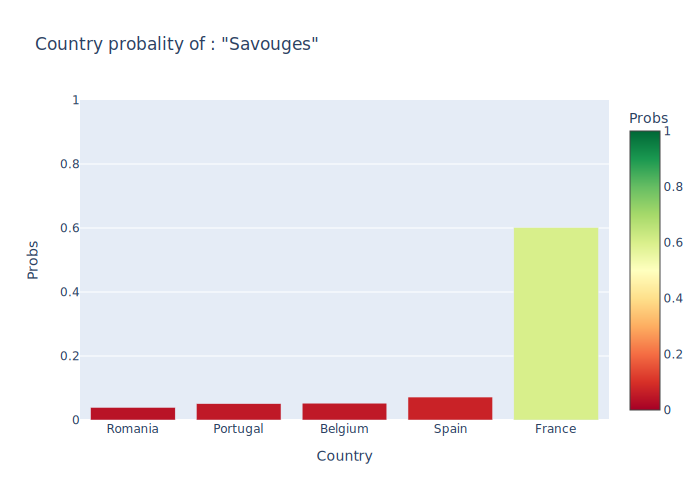

In [19]:
show_prediction("Savouges")

In [54]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict labels for the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels


#converted to label
column_names = Y_test.columns.values
y_pred_label = [column_names[i][8:] for i in y_pred]

Y_test_label = [i[8:] for i in Y_test[Y_test==1].stack().reset_index().drop(0, axis=1)['level_1']]

print(f"Prediction : {y_pred_label[500]}  ")
print(f"True label at position 500: {Y_test_label[500]}")

1317/1317 [==============================] - 12s 9ms/step
Prediction : Italy  
True label at position 500: Indonesia


In [67]:
report = classification_report(
    Y_test_label,
    y_pred_label,
    target_names=column_names,
    output_dict=True
)

df_report = pd.DataFrame(report).transpose()

df_report.sort_values(by=['recall'])

/home/rmarin/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/rmarin/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/rmarin/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,precision,recall,f1-score,support
Country_Afghanistan,0.000000,0.000000,0.000000,53.0
Country_Nepal,0.000000,0.000000,0.000000,22.0
Country_Myanmar,0.000000,0.000000,0.000000,22.0
Country_Moldova,0.000000,0.000000,0.000000,23.0
Country_Malta,0.000000,0.000000,0.000000,19.0
...,...,...,...,...
Country_Indonesia,0.430233,0.673582,0.525083,2362.0
Country_Poland,0.567335,0.683544,0.620042,869.0
Country_Italy,0.430219,0.685650,0.528700,2230.0
Country_Germany,0.489934,0.788690,0.604410,3024.0


In [66]:
df_report.sort_values(by=['precision'])

,precision,recall,f1-score,support
Country_Afghanistan,0.000000,0.000000,0.000000,53.0
Country_Nepal,0.000000,0.000000,0.000000,22.0
Country_Myanmar,0.000000,0.000000,0.000000,22.0
Country_Moldova,0.000000,0.000000,0.000000,23.0
Country_Malta,0.000000,0.000000,0.000000,19.0
...,...,...,...,...
Country_Belarus,0.666667,0.080000,0.142857,75.0
Country_Ukraine,0.676573,0.507874,0.580210,762.0
Country_China,0.776404,0.948900,0.854029,4501.0
Country_Montenegro,1.000000,0.045455,0.086957,22.0
